In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
car = pd.read_csv("data_filled.csv")

In [3]:
car.head()

,Make,Model,Year,Age,Engine HP,Number of Doors,Market Category,Vehicle Size,Vehicle Style,average mpg,Popularity,MSRP
0,Buick,Regal,2016,3,259,4,"Performance,Hybrid",Midsize,Sedan,25.5,155,31900
1,FIAT,124 Spider,2017,2,160,2,Performance,Compact,Convertible,30.5,819,27495
2,FIAT,124 Spider,2017,2,160,2,Performance,Compact,Convertible,30.5,819,24995
3,FIAT,124 Spider,2017,2,160,2,Performance,Compact,Convertible,30.5,819,28195
4,Nissan,200SX,1996,23,140,2,Performance,Compact,Coupe,25.0,2009,2000


In [4]:
car.dtypes

Make                object
Model               object
Year                 int64
Age                  int64
Engine HP            int64
Number of Doors      int64
Market Category     object
Vehicle Size        object
Vehicle Style       object
average mpg        float64
Popularity           int64
MSRP                 int64
dtype: object

In [5]:
# calculate correlation matrix
corr = car.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

TypeError: object of type <class 'float'> cannot be safely interpreted as an integer.

In [6]:
X = car.loc[:, car.columns != 'MSRP']
y = car['MSRP']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 50)


In [8]:
y_test


3860      2000
5903    118795
7150     32495
7214     19960
8723     20760
         ...  
4887     33360
1235     39760
31        2488
9699     19200
823      83495
Name: MSRP, Length: 2979, dtype: int64

In [9]:
car = pd.get_dummies(car, drop_first=True)
print(car.columns)

Index(['Year', 'Age', 'Engine HP', 'Number of Doors', 'average mpg',
       'Popularity', 'MSRP', 'Make_Alfa Romeo', 'Make_Aston Martin',
       'Make_Audi',
       ...
       'Vehicle Style_Convertible', 'Vehicle Style_Convertible SUV',
       'Vehicle Style_Coupe', 'Vehicle Style_Crew Cab Pickup',
       'Vehicle Style_Extended Cab Pickup', 'Vehicle Style_Passenger Minivan',
       'Vehicle Style_Passenger Van', 'Vehicle Style_Regular Cab Pickup',
       'Vehicle Style_Sedan', 'Vehicle Style_Wagon'],
      dtype='object', length=1055)


In [10]:
from sklearn.preprocessing import StandardScaler
X_head = car.iloc[:, car.columns != 'MSRP']
X = car.loc[:, car.columns != 'MSRP']
y = car['MSRP']
X = StandardScaler().fit_transform(X)

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)
model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [12]:
len(X_test)

2979

In [13]:
X_test[0]

array([-1.5020061 ,  1.5020061 , -0.08654333, ..., -0.18445019,
       -0.58633203, -0.22866478])

In [14]:
len(pred)

2979

In [15]:
pred[0]

2561.7566666666667

In [16]:
dfResults = pd.DataFrame(X_test)

In [17]:
dfResults.head()

,0,1,2,3,4,5,6,7,8,9,...,1044,1045,1046,1047,1048,1049,1050,1051,1052,1053
0,-1.502006,1.502006,-0.086543,-1.629778,-0.309772,-0.970950,-0.02049,-0.088698,-0.168256,-0.169832,...,-0.267033,-0.049397,2.972903,-0.246221,-0.234897,-0.190448,-0.104213,-0.184450,-0.586332,-0.228665
1,0.477037,-0.477037,-0.999074,0.639777,10.995074,-0.117847,-0.02049,-0.088698,-0.168256,-0.169832,...,-0.267033,-0.049397,-0.336372,-0.246221,-0.234897,-0.190448,-0.104213,-0.184450,-0.586332,-0.228665
2,-0.050708,0.050708,0.552228,-1.629778,-0.771195,0.205361,-0.02049,-0.088698,-0.168256,-0.169832,...,-0.267033,-0.049397,-0.336372,-0.246221,-0.234897,-0.190448,-0.104213,5.421518,-0.586332,-0.228665
3,-0.050708,0.050708,-0.743565,0.639777,0.267005,-0.475041,-0.02049,-0.088698,-0.168256,-0.169832,...,-0.267033,-0.049397,-0.336372,-0.246221,-0.234897,-0.190448,-0.104213,-0.184450,-0.586332,4.373214
4,0.872845,-0.872845,0.460975,0.639777,-0.252095,1.637604,-0.02049,-0.088698,-0.168256,5.888180,...,-0.267033,-0.049397,-0.336372,-0.246221,-0.234897,-0.190448,-0.104213,-0.184450,-0.586332,-0.228665


In [18]:
dfResults['MSRP'] = pred

In [19]:
dfResults.head()

,0,1,2,3,4,5,6,7,8,9,...,1045,1046,1047,1048,1049,1050,1051,1052,1053,MSRP
0,-1.502006,1.502006,-0.086543,-1.629778,-0.309772,-0.970950,-0.02049,-0.088698,-0.168256,-0.169832,...,-0.049397,2.972903,-0.246221,-0.234897,-0.190448,-0.104213,-0.184450,-0.586332,-0.228665,2561.756667
1,0.477037,-0.477037,-0.999074,0.639777,10.995074,-0.117847,-0.02049,-0.088698,-0.168256,-0.169832,...,-0.049397,-0.336372,-0.246221,-0.234897,-0.190448,-0.104213,-0.184450,-0.586332,-0.228665,26667.680000
2,-0.050708,0.050708,0.552228,-1.629778,-0.771195,0.205361,-0.02049,-0.088698,-0.168256,-0.169832,...,-0.049397,-0.336372,-0.246221,-0.234897,-0.190448,-0.104213,5.421518,-0.586332,-0.228665,26828.997381
3,-0.050708,0.050708,-0.743565,0.639777,0.267005,-0.475041,-0.02049,-0.088698,-0.168256,-0.169832,...,-0.049397,-0.336372,-0.246221,-0.234897,-0.190448,-0.104213,-0.184450,-0.586332,4.373214,27799.810833
4,0.872845,-0.872845,0.460975,0.639777,-0.252095,1.637604,-0.02049,-0.088698,-0.168256,5.888180,...,-0.049397,-0.336372,-0.246221,-0.234897,-0.190448,-0.104213,-0.184450,-0.586332,-0.228665,61917.000000


In [24]:
dfy_test = pd.DataFrame(y_test)
dfy_test.head()

,MSRP
10736,2379
3828,27010
4554,25155
2506,28700
6745,63700


In [39]:
dfResults['testMSRP']=dfy_test.reset_index()["MSRP"]
dfResults.head(15)

,0,1,2,3,4,5,6,7,8,9,...,1046,1047,1048,1049,1050,1051,1052,1053,MSRP,testMSRP
0,-1.502006,1.502006,-0.086543,-1.629778,-0.309772,-0.970950,-0.02049,-0.088698,-0.168256,-0.169832,...,2.972903,-0.246221,-0.234897,-0.190448,-0.104213,-0.184450,-0.586332,-0.228665,2561.756667,2379
1,0.477037,-0.477037,-0.999074,0.639777,10.995074,-0.117847,-0.02049,-0.088698,-0.168256,-0.169832,...,-0.336372,-0.246221,-0.234897,-0.190448,-0.104213,-0.184450,-0.586332,-0.228665,26667.680000,27010
2,-0.050708,0.050708,0.552228,-1.629778,-0.771195,0.205361,-0.02049,-0.088698,-0.168256,-0.169832,...,-0.336372,-0.246221,-0.234897,-0.190448,-0.104213,5.421518,-0.586332,-0.228665,26828.997381,25155
3,-0.050708,0.050708,-0.743565,0.639777,0.267005,-0.475041,-0.02049,-0.088698,-0.168256,-0.169832,...,-0.336372,-0.246221,-0.234897,-0.190448,-0.104213,-0.184450,-0.586332,4.373214,27799.810833,28700
4,0.872845,-0.872845,0.460975,0.639777,-0.252095,1.637604,-0.02049,-0.088698,-0.168256,5.888180,...,-0.336372,-0.246221,-0.234897,-0.190448,-0.104213,-0.184450,-0.586332,-0.228665,61917.000000,63700
5,-2.293623,2.293623,-0.451556,0.639777,-0.425128,-0.936965,-0.02049,-0.088698,-0.168256,-0.169832,...,-0.336372,-0.246221,-0.234897,-0.190448,-0.104213,-0.184450,1.705518,-0.228665,2061.236833,2000
6,0.477037,-0.477037,0.734734,-1.629778,-0.021383,-0.946675,-0.02049,-0.088698,-0.168256,-0.169832,...,2.972903,-0.246221,-0.234897,-0.190448,-0.104213,-0.184450,-0.586332,-0.228665,41405.000000,40950
7,0.477037,-0.477037,-0.725315,-1.629778,0.093972,-0.472960,-0.02049,-0.088698,-0.168256,-0.169832,...,-0.336372,-0.246221,-0.234897,-0.190448,-0.104213,-0.184450,-0.586332,-0.228665,27474.336607,27295
8,-2.557496,2.557496,-1.218081,-1.629778,-0.425128,0.205361,-0.02049,-0.088698,-0.168256,-0.169832,...,-0.336372,-0.246221,-0.234897,-0.190448,-0.104213,5.421518,-0.586332,-0.228665,2000.000000,2000
9,0.608973,-0.608973,2.833554,-1.629778,-0.713517,1.637604,-0.02049,-0.088698,-0.168256,5.888180,...,2.972903,-0.246221,-0.234897,-0.190448,-0.104213,-0.184450,-0.586332,-0.228665,113381.233333,111900


In [37]:
dfR = dfResults[["MSRP","testMSRP"]]
dfR.head()

,MSRP,testMSRP
0,2561.756667,2379
1,26667.680000,27010
2,26828.997381,25155
3,27799.810833,28700
4,61917.000000,63700


In [38]:
exportMSRP = dfR.to_csv("predit_test.csv")

In [34]:
#dfy_test.reset_index()["MSRP"]

In [30]:
print(mae(y_test, pred))
print(car['MSRP'].mean())
model.score(X_test,y_test)

3107.47525087873
40594.737032063116


0.981171462498668

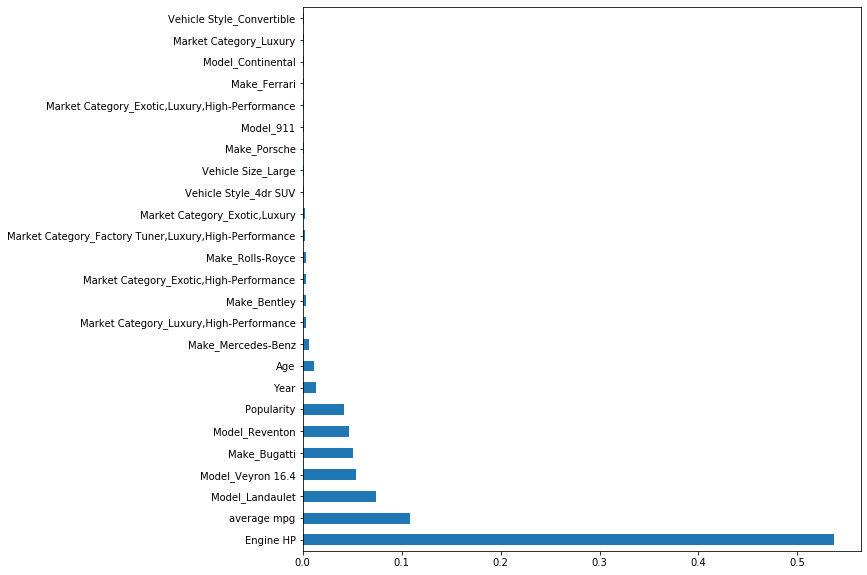

In [36]:
feat_importances = pd.Series(model.feature_importances_, index=X_head.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))